## HW4 PART1 : K-MEANS CLUSTERING ON IRIS DATASET
##### NAME : SRIPATH CHERUKURI
##### G-NO : G01395231

#### importing required packages

In [81]:
# importing numpy to handle with array data
import numpy as np

# importing pandas to read the text data initially
import pandas as pd

# importing the matplotlib to plot graphs in the implementation
import matplotlib.pyplot as plt

# importing the tsne (T-distributed stochastic neighbor embedding) for dimensionality reduction
from sklearn.manifold import TSNE

#### defining the euclidean distance function to calculate the distsances between the centroid and the points in the cluster

In [82]:
# using euclidean distance as a metric in this implementation
def distance_calculation(point1, point2):
    # returning the squared sum of the different points - euclidean distance
    return np.sqrt(np.sum((point1-point2)**2))

#### defining a function to calculate the nearest centroids

In [83]:
def find_nearest_pivot(_n_sample,__pivots):
    distances =[]
    # traversing through all centroids
    for pivot in __pivots:
        # calculating the euclidean distance for the each centroid and the data point
        distances.append(distance_calculation(_n_sample, pivot))
    # now we are getting the index of the smallest value in the calculated euclidean distances
    nearest_pivot_index = np.argmin(distances)
    # returining the value
    return nearest_pivot_index

#### defining a function to create clusters 

In [84]:
def make_bundles(_n_bundles, _dataset, _pivots):
    bundles = []
    # traversing thorugh the number of clusters 
    for index in range(_n_bundles):
        # forming a list of lists
        bundles.append([])
        # traversing thorugh the read data
    for index, n_sample in enumerate(_dataset):
        # calling the function to find nearest centroids
        pivot_index = find_nearest_pivot(n_sample, _pivots)
        # and appendind their indexes for later use
        bundles[pivot_index].append(index)
    # returning the created clusters
    return bundles

#### defining a function to update centroids after calculating distances and checking for variance

In [85]:
def updated_pivots(_n_bundles,_dataset, _bundles):
    # updating the centroids based on mean calculated below
    pivots = np.zeros((_n_bundles, _dataset.shape[1]))
    # iterating through the clusters
    for bundle_index, bundle in enumerate(_bundles):
        # omputing mean of clusters to find new centroids
        bundle_mean = np.mean(_dataset[bundle], axis=0)
        pivots[bundle_index] = bundle_mean
    # returning centroids
    return pivots

#### function to check variance i.e, if there is better centroids available

In [86]:
def check_for_variance(_n_bundles, _old_pivots, _pivots):
    dists = []
    # iterating through the three clusters in this implmentation
    for index in range(_n_bundles):
        # checking if theres an difference between the old centroids and new centroids
        dists.append(distance_calculation(_old_pivots[index], _pivots[index]))
    # if there's no difference then we return true and stop the clustering algorithm
    if sum(dists)==0:
        return True
    else:
        # else we return false and the algorithm continues running
        return False

#### defining function to start k means clustering 

In [87]:
def k_means(dataset, n_bundles, pivots, repeat_max):
    # initializng a intial variable for iterating through max number of iteraions
    i=0
    # initializing centroids list
    pivots = []
    # getting reandom indices from the dataset read from text file
    arbitrary_dataset_indices = np.random.choice(dataset.shape[0], n_bundles, replace=False)
    
    # picking the random centroids from the above obtained random indices
    for index in arbitrary_dataset_indices:
        pivots.append(dataset[index])

    # now we iterate through major steps where we create clusters, update centroids and check wether we picked the best centroids
    while i < repeat_max:
        bundles = make_bundles(n_bundles, dataset, pivots)
        
        # storing centroids before updating them
        old_pivots = pivots
        # updating centroids
        pivots = updated_pivots(n_bundles, dataset, bundles)

        # checking if there's any difference between the old centroids and new centroids
        if check_for_variance(n_bundles, old_pivots, pivots):
            break
        # this loop repeats itself until we find the best centroids
        i = i+1
    
    # we are now making predictions from 0 to 9
    clabs = np.empty(dataset.shape[0])
    for bundle_index, bundle in enumerate(bundles):
        for n_sample_index in bundle:
            clabs[n_sample_index] = bundle_index
    return clabs, bundles, pivots
        


#### function to plot graph after applying k means clustering

In [88]:
def plot_graph(_dataset, ppreds, pivotsp):
    plt.title('Result after applying kmeans clustering')
    # defining the colors list to pick from 
    colors =['cyan', 'blue', 'green']
    # we iterate 3 times as there are 3 clusters in this program
    for i in range(3):
        # using scatter function to plot scatter graph
        plt.scatter(_dataset[ppreds == i, 0], _dataset[ppreds == i, 1], s = 30, marker = '2', c = colors[i], label = 'Cluster'+str(i+1))
    # now we are plotting the centroids
    plt.scatter(pivotsp[:, 0], pivotsp[:, 1], s = 70, marker='^', c = 'red', label = 'Centroids')
    plt.legend()
    plt.show()

#### loading data from text file

In [89]:
# reading the dataset from text file and saving it into variable as float data type
dataset = pd.read_csv("test_file_iris.txt", header=None, dtype='float', sep=" ")
# converting the pandas dataframe to numpy array
dataset = dataset.to_numpy()

print("Shape of the dataset before performing dimensionality reduction: {}\n".format(dataset.shape))

Shape of the dataset before performing dimensionality reduction: (150, 4)



#### using tsne a dimensionality reduction technique for reducing dimensionality of the data

In [90]:
# initializing the tsne reducer
dim_reduce = TSNE(n_components=2, perplexity=10)
# transforming the data into 2 dimension using tsne
tsne_dataset = dim_reduce.fit_transform(dataset)

print("Shape of the dataset after performing dimensionality reduction: {}\n".format(tsne_dataset.shape))

/Users/sripathch/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sripathch/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Shape of the dataset after performing dimensionality reduction: (150, 2)



#### initializing the variables and calling the k meas function

In [91]:
pivots = []
# max number of iterations
repeat_max = 50
# given number of clusters in this implemenation are 3
n_bundles = 3
# calling kmeans function
preds, bundles_plot, pivots_plot = k_means(tsne_dataset, n_bundles, pivots, repeat_max)

#### calling the function to plot the clusters and centroids after k means

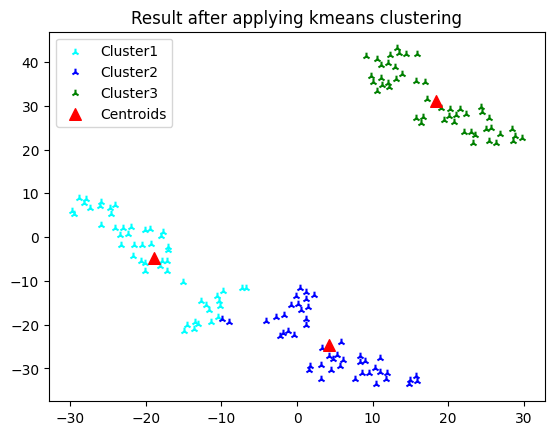

In [92]:
# calling plot functio to plot the graph
plot_graph(tsne_dataset, preds, pivots_plot)

#### defining a function to calculate the means squared error for the elbow graph

In [93]:
def sserror(_lpreds,_preds):
  # intializing sum to zero for adding later
  sum = 0 
  size_of_lpreds = len(_lpreds) 
  for i in range (1, size_of_lpreds):
    # calculating the difference between the predicted values for 10 clusters and the values of clutsers from 2 to 20
    diff = _lpreds[i] - _preds[i]  
    # squaring the difference
    sdiff = diff**2 
    # adding to the sum
    sum = sum + sdiff 
  # returning the mean 
  return sum/size_of_lpreds  

#### getting distortions/error for plotting the elbow graph for k values from 2 to 20 with an increment of 2

In [94]:
# initializing distortion/ differences list
dtort = []
lbow_pivots = []
# defining the k values
k_values = [2,4,6,8,10,12,14,16,18,20]
for value in k_values:
    # finding error for every k value
    lpreds, lbundles_plot, lpivots_plot = k_means(tsne_dataset, value, lbow_pivots, repeat_max) 
    # appending it to the list cerated above
    dtort.append(sserror(lpreds,preds))

#### plotting elbow curve for k values

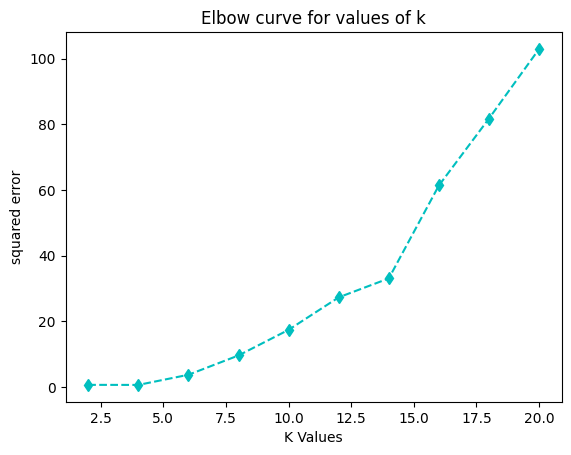

In [95]:
# plotting the elbow curve for best possible value of k
plt.figure()
plt.title('Elbow curve for values of k')
plt.xlabel('K Values')
plt.ylabel('squared error')
plt.plot(k_values, dtort, 'c--d')
plt.show()

#### writing the predicted values by k means algorithm into a text file

In [96]:
# opening a file using file object to print preds made by the algorithm
file = open("kmeans_preds.txt", "w")

# using for loop to loop through prediction values
for pred in preds:
        file.write(str(int(pred+1))+"\n")

# closing file object after pritning
file.close()